## **Linear Regression**

Linear Regression is one of the algorithms of Machine Learning that is categorized as a Supervised Learning algorithm.

Linear regression is used to find the relationship between the target and one or more predictors. Here the target is the dependent variable and the predictors are the independent variables.
Examples of Regression:
1. Predicting the house price
2. Predict the sale of products in the future based on past buying behaviour
3. Trend analysis of stock market price

![alt text](https://images.slideplayer.com/25/7764095/slides/slide_4.jpg)

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. 

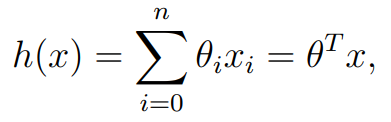



1. CRIM: This column represents per capita crime rate by town
2. ZN: This column represents the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3. INDUS: This column represents the proportion of non-retail business acres per town.
4. CHAS: This column represents the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
NOX: This column represents the concentration of the nitric oxide (parts per 10 million)
5. RM: This column represents the average number of rooms per dwelling
6. AGE: This column represents the proportion of owner-occupied units built prior to 1940
7. DIS: This column represents the weighted distances to five Boston employment centers
8. RAD: This column represents the index of accessibility to radial highways
9. TAX: This column represents the full-value property-tax rate per $10,000

10. PTRATIO: This column represents the pupil-teacher ratio by town
11. B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
12. LSTAT: This is the percentage lower status of the population
13. MEDV: This is the median value of owner-occupied homes in $1000s



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The variable MEDV indicates the prices of the houses and is the target variable. The rest of the variables are the predictors based on which we will predict the value of the house.

In the above result, we can see that the target variable ‘MEDV’ is missing from the data. We will create a new column of target values and add them to the dataframe.

In [5]:
bos['MEDV'] = boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


Checking the statistical values of the dataset using the describe() function.

In [8]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We will now check for null values if any present in the dataset.


In [9]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no null value present in the dataset.

## EDA - Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. We will use some visualizations to understand the relationship of the target variable with other variables.

We will first plot the distribution of the target variable MEDV. For this we will use the distplot() function from the seaborn library.

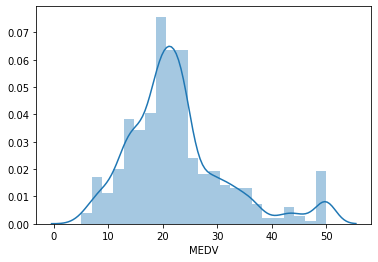

In [10]:
sns.distplot(bos['MEDV'])
plt.show()

From the above output we can see that the values of MEDV is normally distributed with some of the outliers.

We will now visualize the pairplot which shows the relationships between all the features present in the dataset.

In [11]:
sns.pairplot(bos)

Error in callback <function flush_figures at 0x11c6c74d0> (for post_execute):


KeyboardInterrupt: 

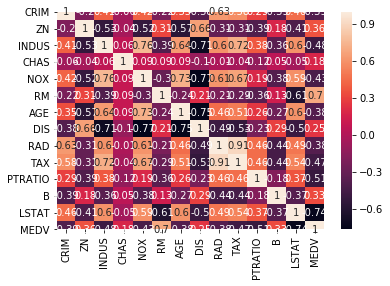

In [12]:
corr_mat = bos.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

From the above two graphs, we can clearly see that the feature RM has a positive correlation with MEDV.

Based on the above observations we will plot an lmplot between RM and MEDV to see the relationship between the two more clearly.

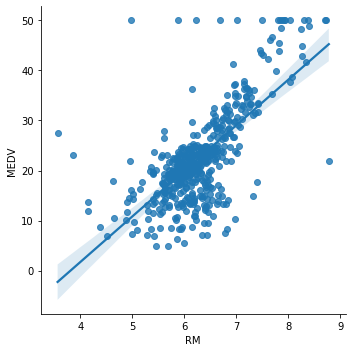

In [0]:
sns.lmplot(x = 'RM', y = 'MEDV', data = bos)

Splitting the data into Training and Test Data

We will now split the dataset into training and test data. We do this to train our model with 80% of the samples and test with the remaining 20%.

We are using the train_test_split function from the sklearn library to split the data.

In [14]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = bos['MEDV']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

**Training the Model**

We will now train our model using the LinearRegression function from the sklearn library.

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

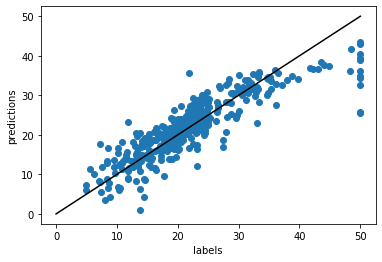

In [33]:
prediction = lm.predict(X_train)
plt.scatter(y_train, prediction)
plt.plot([0,50], [0, 50], 'k-')
plt.xlabel('labels')
plt.ylabel('predictions')
plt.show()

In [34]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Training accuracy")
print('MAE', metrics.mean_absolute_error(y_train, prediction))
print('MSE', metrics.mean_squared_error(y_train, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, prediction)))
print('R squared error', r2_score(y_train, prediction))

Training accuracy
MAE 3.0830955828177675
MSE 19.230858879373056
RMSE 4.385300318036731
R squared error 0.750121534530608


**Testing model**

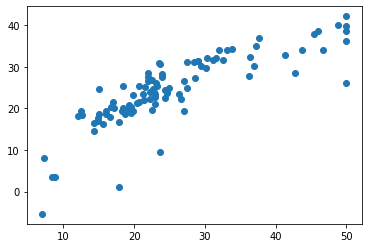

In [22]:
prediction = lm.predict(X_test)
plt.scatter(y_test, prediction)

Plotting the data frame for the actual and predicted value and plotting a graph for the same.

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':prediction})
df2 = df1.head(10)
df2

,Actual,Predicted
305,28.4,31.078964
193,31.1,31.721694
65,23.5,30.873149
349,26.6,22.282350
151,19.6,18.856061
433,14.3,16.471325
161,50.0,36.050042
129,14.3,14.640323
269,20.7,25.240786
226,37.6,36.920739


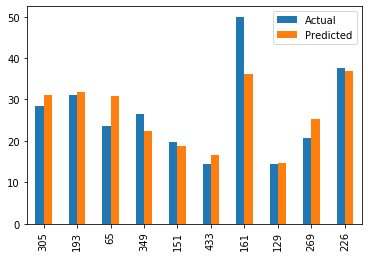

In [24]:
df2.plot(kind = 'bar')

From the above graph, we can see that there is not much difference between the actual and predicted values,  Hence our predicted model seems to work pretty well.

**Model Evaluation**

We will now evaluate the model using the metrics and r2_score function from sklearn library.

Here we will evaluate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R-squared value.

The value of R-square ranges from 0 to 1 where value ‘1’ ( or near to 1) indicates predictor perfectly accounts for all the variation in Y.

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared error', r2_score(y_test, prediction))

MAE 4.061419182954695
MSE 34.413968453138324
RMSE 5.866341999333002
R squared error 0.6709339839115651
